# Socket
socket嵌套字，建立一个嵌套字对象代表打开了一个网络连接。
## socket通信流程如下：

![流程](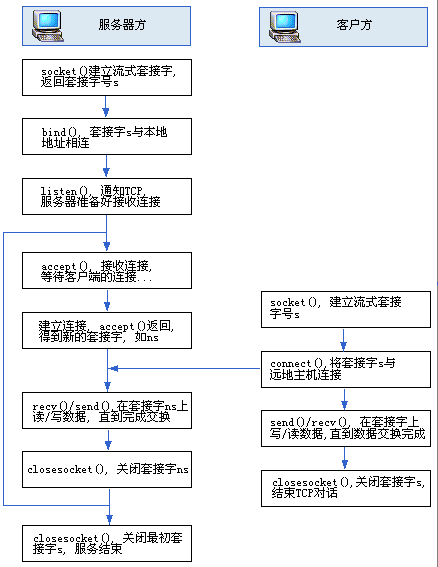
)

## socket相关信息： 

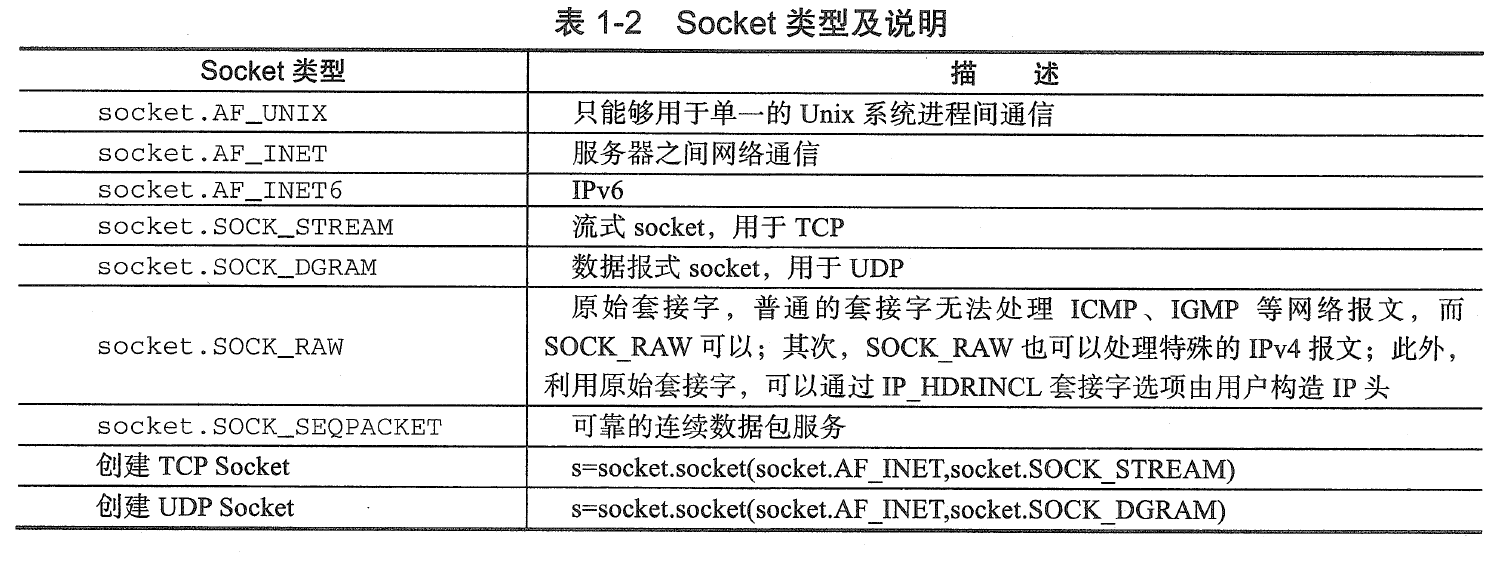

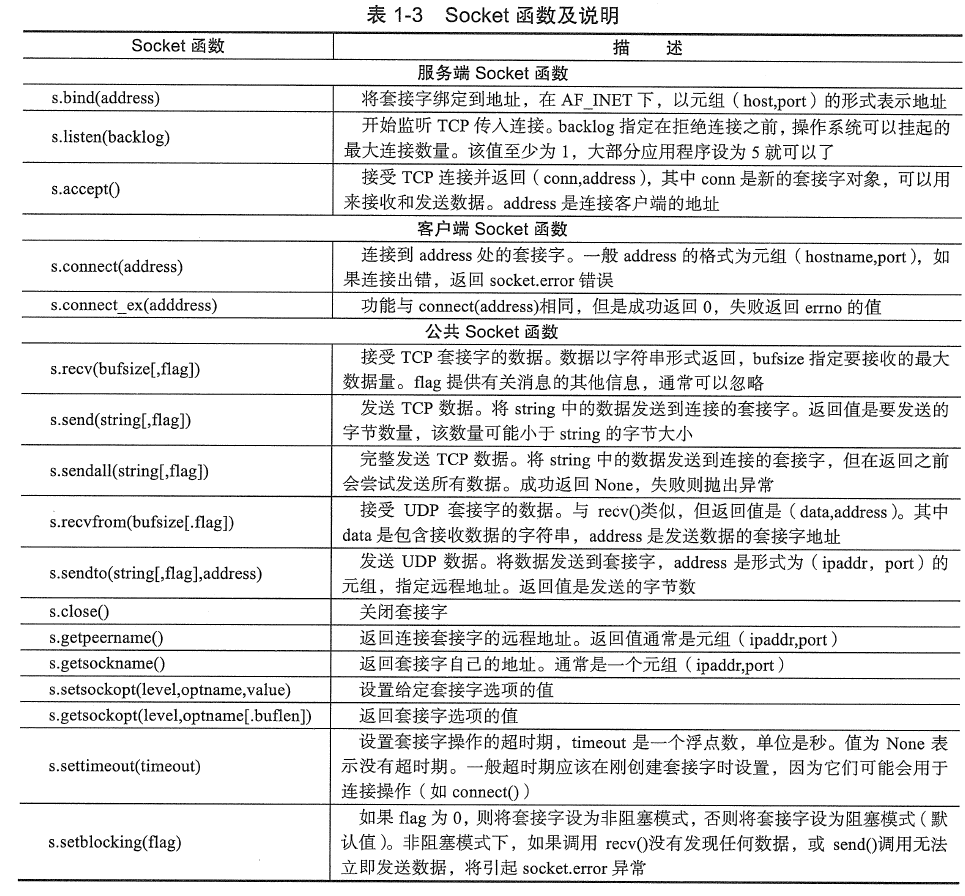

# TCP编程

In [3]:
import socket
import threading
import time


# 服务端
def deal_client(sock,addr):
    print('Accept new connection from {}'.format(addr))
    # send() 的参数为二进制数据,字节数据
    sock.send(b'Hello, I am a server.')
    while True:
        # recv()接收到的是字节数据
        data=sock.recv(1024)
        time.sleep(1)
        if not data or data.decode('utf-8')=='exit':
            break
        print('--->>{}'.format(data.decode('utf-8')))
        sock.send(('Loop_Msg:{}'.format(data.decode('utf-8'))).encode('utf-8'))
    sock.close()
    print('Connection from {} closed.'.format(addr))


if __name__ == "__main__":
    # 创建一个基于IPv4和TCP协议的Socket
    s=socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # 绑定IP（本地IP）与端口, bind takes a tuple as args
    s.bind(('127.0.0.1',4013))
    s.listen(5)
    print('Waiting for connection...')
    while True:
        sock,addr=s.accept()
        #创建新线程来处理TCP连接
        t=threading.Thread(target=deal_client,args=(sock,addr))
        t.start()
        
        
# 客户端
s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
#连接目标IP和端口,connect takes a tuple as args
s.connect(('127.0.0.1',4013))
#接收消息
print('--->>'+s.recv(1024).decode('utf-8'))
#发送消息
s.send(b'Hello, I am a client.')
s.send(b'exit')
s.close()

OSError: [WinError 10048] 通常每个套接字地址(协议/网络地址/端口)只允许使用一次。